In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [59]:
dt = pd.read_csv('delivery_time.csv')

In [60]:
dt.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [61]:
dt.shape

(21, 2)

In [62]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [63]:
dt.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [64]:
dt = dt.rename(columns = {'Delivery Time': 'DT', 'Sorting Time': 'ST'}, inplace = False)
dt

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [65]:
print(kurtosis(dt.DT))
print(kurtosis(dt.ST))

-0.02558576894549036
-1.1653901357029155


In [66]:
print(skew(dt.DT))
print(skew(dt.ST))

0.326702631656106
0.043680994983108075


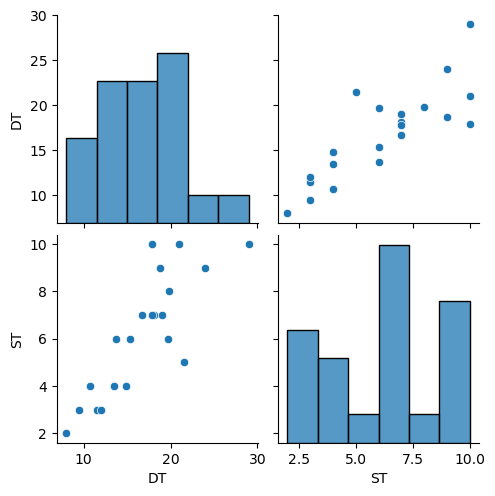

In [67]:
sns.pairplot(dt)

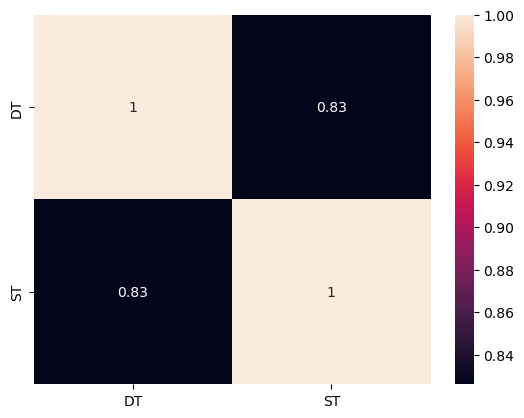

In [69]:
corrMatrix = dt.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

<Axes: >

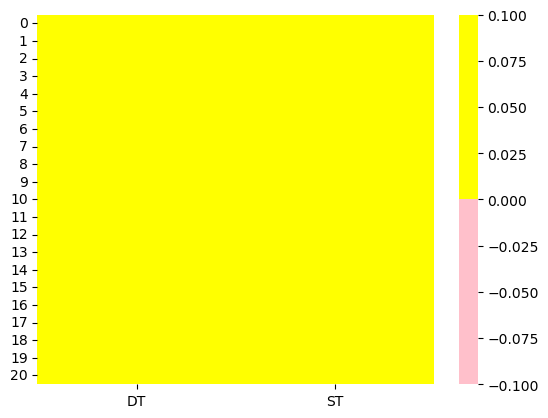

In [70]:
cols = dt.columns 
colours = ['#ffc0cb', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(dt[cols].isnull(),
            cmap=sns.color_palette(colours))

#no null values

<Axes: >

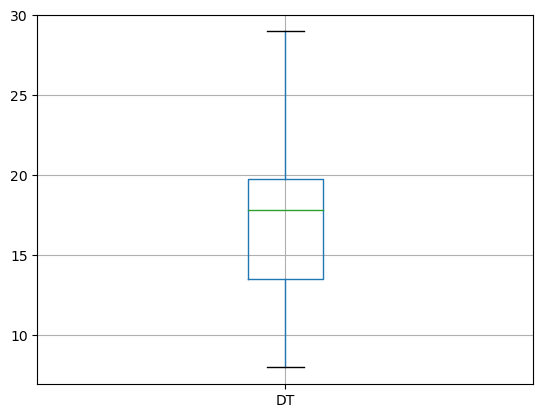

In [71]:
dt.boxplot(column=['DT'])

<Axes: >

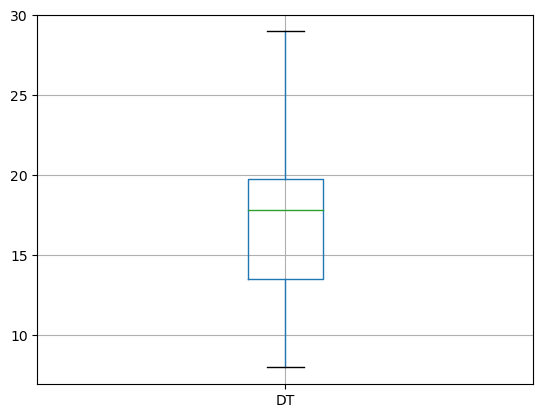

In [72]:
dt.boxplot(column=['DT'])

In [73]:
dt[dt.duplicated()].shape

(0, 2)

<Axes: >

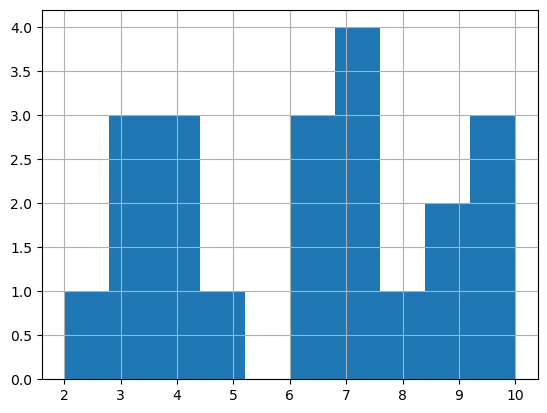

In [74]:
# histogram of Ozone
dt['ST'].hist()

<Axes: >

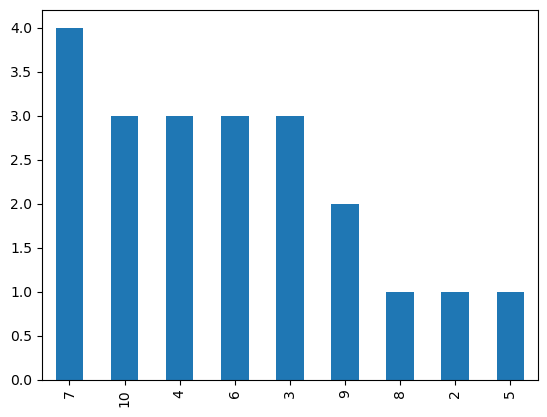

In [75]:
dt['ST'].value_counts().plot.bar()

In [77]:
#Correlation
dt.corr()

,DT,ST
DT,1.000000,0.825997
ST,0.825997,1.000000


/var/folders/cm/j358s8y57ddbtd58gtsc0wwr0000gn/T/ipykernel_2972/3766961763.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['DT'])


<Axes: xlabel='DT', ylabel='Density'>

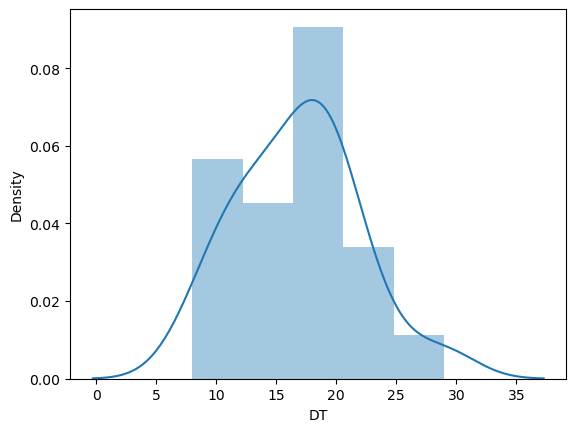

In [76]:
sns.distplot(dt['DT'])

/var/folders/cm/j358s8y57ddbtd58gtsc0wwr0000gn/T/ipykernel_2972/1684703032.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dt['ST'])


<Axes: xlabel='ST', ylabel='Density'>

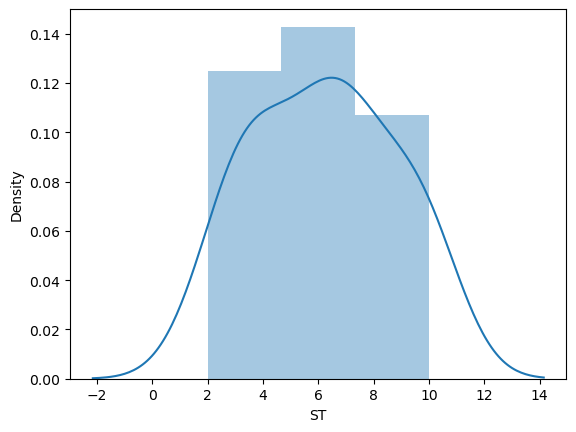

In [78]:
sns.distplot(dt['ST'])

<Axes: xlabel='ST', ylabel='DT'>

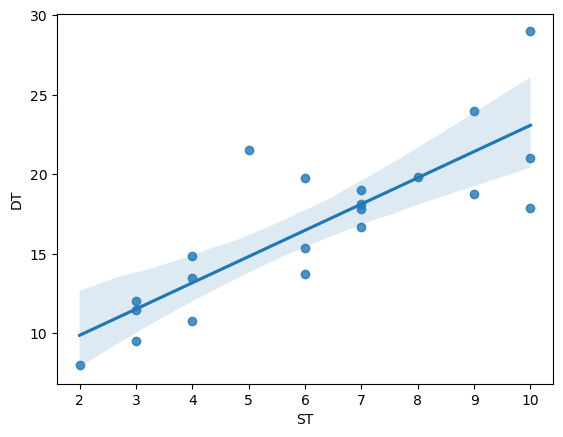

In [79]:
sns.regplot(x="ST", y="DT", data=dt)

# applying transformations

In [81]:
# Apply log transformation to "Sorting Time"
dt['Log Sorting Time'] = np.log(dt['ST'])

# Apply square root transformation to "Sorting Time"
dt['Sqrt Sorting Time'] = np.sqrt(dt['ST'])

In [84]:
# Features: Sorting Time (original), Log Sorting Time, Sqrt Sorting Time
x = dt[['ST', 'Log Sorting Time', 'Sqrt Sorting Time']]

# Target variable: Delivery Time
y = dt['DT']

In [85]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [86]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [87]:
# Make predictions on the test data
y_pred = model.predict(x_test)

In [90]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 19.324332566462424


# Root Mean Squared Error (RMSE)

In [97]:
# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 4.395945014039919


In [100]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: -1.7799931071718138


In [101]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 2.982847056630106


In [99]:
# ... (previous steps)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Actual Delivery Time': y_test,
    'Predicted Delivery Time': y_pred,
    'Original Sorting Time': x_test['ST'],
    'Log Transformed Sorting Time': x_test['Log Sorting Time'],
    'Sqrt Transformed Sorting Time': x_test['Sqrt Sorting Time']
})

# Display the comparison table
print(comparison_df)


    Actual Delivery Time  Predicted Delivery Time  Original Sorting Time  \
0                  21.00                26.162341                     10   
17                 18.11                18.219553                      7   
15                 14.88                13.581144                      4   
1                  13.50                13.581144                      4   
8                  17.90                26.162341                     10   

    Log Transformed Sorting Time  Sqrt Transformed Sorting Time  
0                       2.302585                       3.162278  
17                      1.945910                       2.645751  
15                      1.386294                       2.000000  
1                       1.386294                       2.000000  
8                       2.302585                       3.162278  
